# Ramya Raman


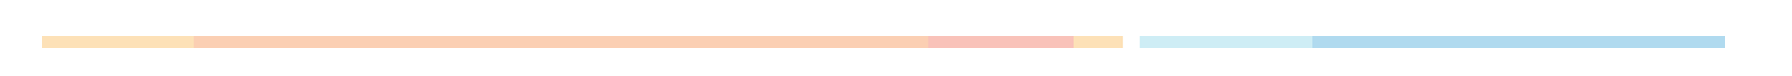



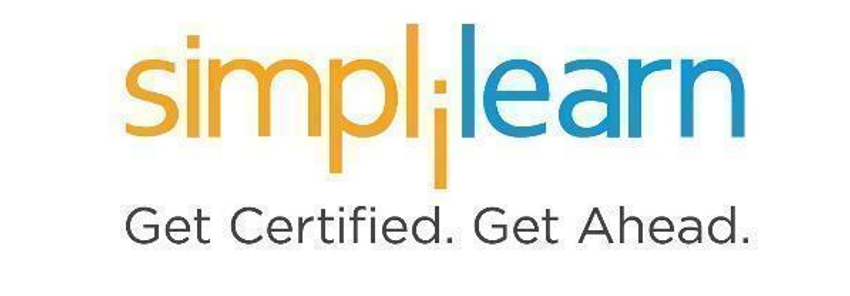



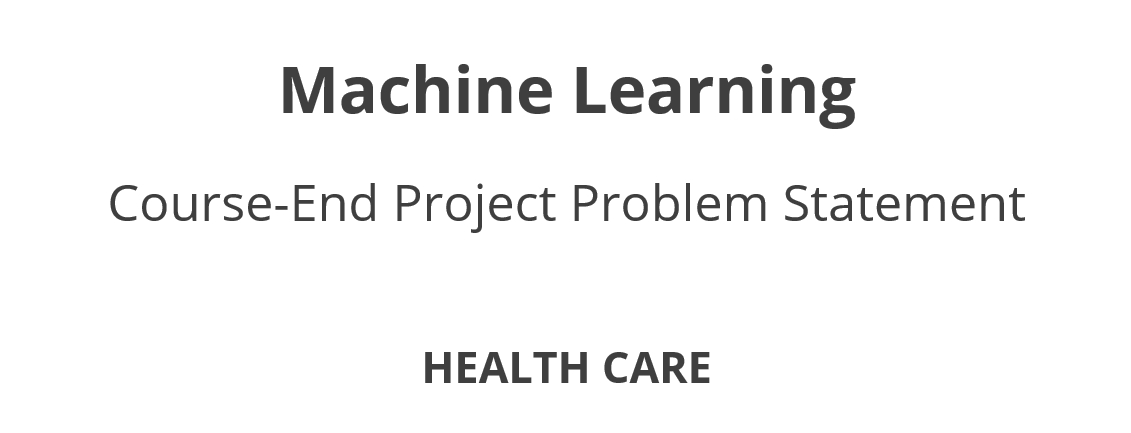




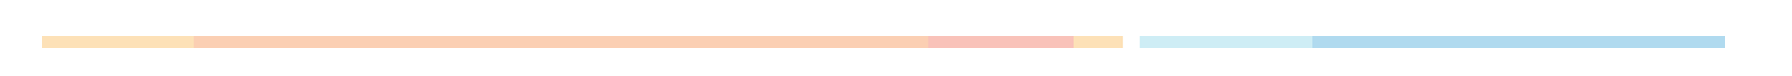



### Preliminary Analysis

a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.


b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

#### Solution:

In the preliminary analysis, the excel data is read using pandas and the necessary data cleaning is done to check the data structure to check if the format is in the data frame, missing values and duplicates are checked. Below is the code is attached along with the output.

In [1]:
import pandas as pd
import numpy as np
#import os
data = pd.read_excel('1645792390_cep1_dataset.xlsx')

In [2]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
## Check th columns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
## Check the shape of the data
data.shape

(303, 14)

In [6]:
## Check Null value
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
## Sum returns the total no of missing 
## Sorts
data.isnull().sum().sort_values(ascending=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data=data.dropna()

In [9]:
data.isnull().sum().sort_values(ascending=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.shape

(303, 14)

In [11]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
## Normalizing to know how many percentage of Yes and No we will have
data['exang'].value_counts(normalize=True)

0    0.673267
1    0.326733
Name: exang, dtype: float64

<AxesSubplot:>

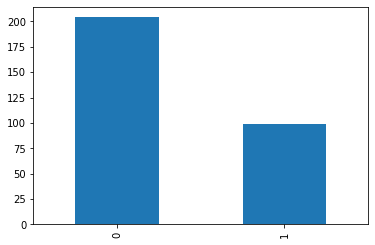

In [13]:
## Plot in bar plot
data['exang'].value_counts().plot.bar()

In [14]:
## How many people are male and female - 1 = male; 0 = female
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
## How many has Fasting blood sugar > 120 mg/dl 
data['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [16]:
## Chest pain type
data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [17]:
## Fixed or reversible defect
data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

### 2.Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below

 a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
 

 b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 
 
#### Solution
 
Count plot, distplot are are used to address the solution of a and b. The dist plot give a overall spread of data.

##### Categorical data : 
Categorical data identified are sex, cp, fbs, restecg, exang, slope, ca, thal. Countplots based on them as plotted below.


<AxesSubplot:xlabel='sex', ylabel='count'>

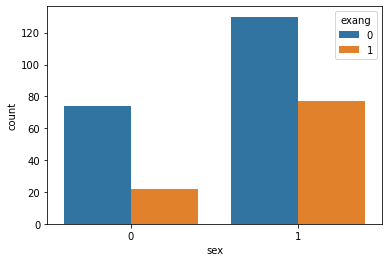

In [18]:
## Find how many male and female have 
## Exercise induced angina (1 = yes; 0 = no)
## Female = 0 and male =1
%matplotlib inline
import matplotlib as plt
import seaborn as sns
sns.countplot(x='sex', hue='exang', data=data)

<AxesSubplot:xlabel='fbs', ylabel='count'>

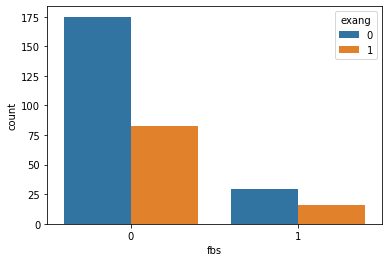

In [19]:
## How many has Fasting blood sugar > 120 mg/dl and exang

sns.countplot(x='fbs', hue='exang', data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

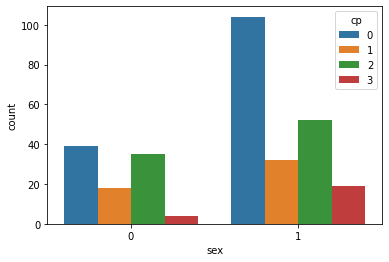

In [20]:
## How many has male and female has chest pain or not
sns.countplot(x='sex', hue='cp', data=data)

<AxesSubplot:>

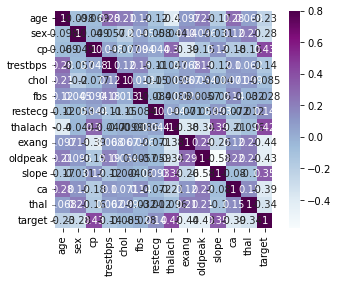

In [21]:
##Correlation
sns.heatmap(data.corr(), vmax=0.8, square= True, cmap='BuPu', annot= True) 

<AxesSubplot:xlabel='exang'>

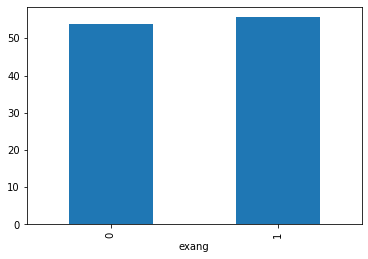

In [22]:
## Group based on the exang and age

data.groupby('exang')['age'].mean().plot.bar()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


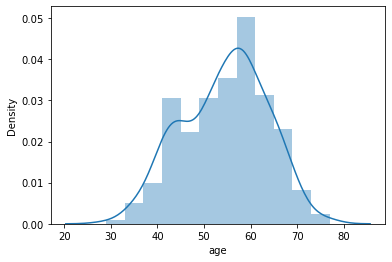

In [23]:
#Distplot provides the distribution central tendency
import matplotlib.pyplot as plt
sns.distplot(data['age'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


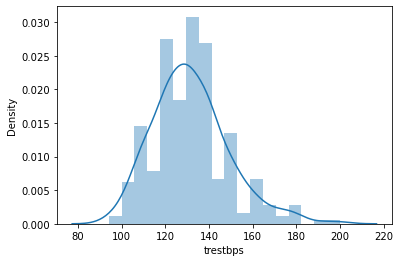

In [24]:
sns.distplot(data['trestbps'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


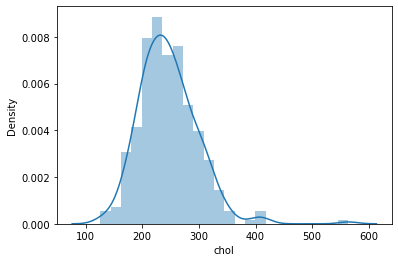

In [25]:
sns.distplot(data['chol'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


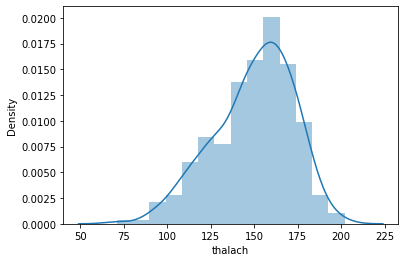

In [26]:
sns.distplot(data['thalach'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


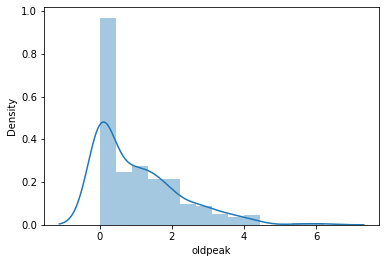

In [27]:
sns.distplot(data['oldpeak'])
plt.show()

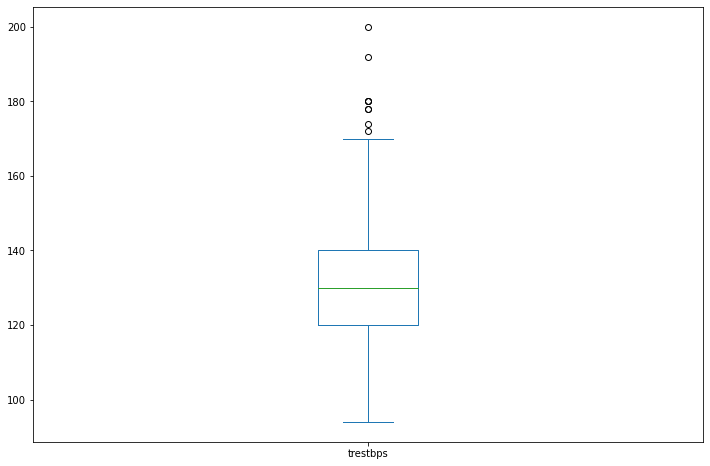

In [28]:
## Box plot shows the outliers that are extreme values out of ranges

data['trestbps'].plot.box(figsize=(12,8))
plt.show()

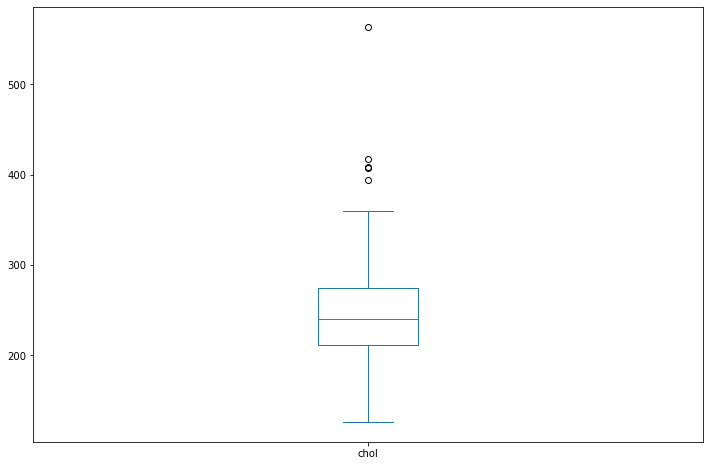

In [29]:
data['chol'].plot.box(figsize=(12,8))
plt.show()

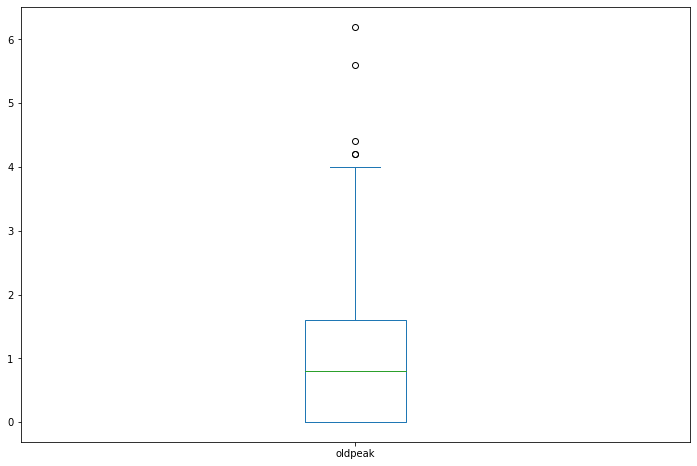

In [30]:
data['oldpeak'].plot.box(figsize=(12,8))
plt.show()

Text(0.5, 0.98, '')

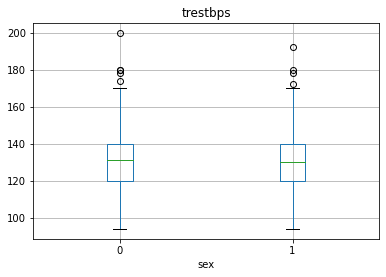

In [31]:
data.boxplot(column='trestbps', by = 'sex') 
plt.suptitle("")

Text(0.5, 0.98, '')

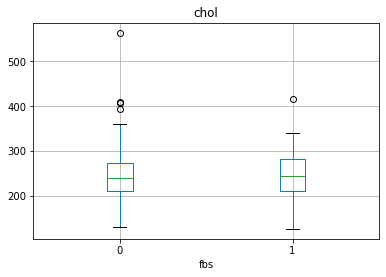

In [32]:
data.boxplot(column='chol', by = 'fbs') 
plt.suptitle("")

<AxesSubplot:>

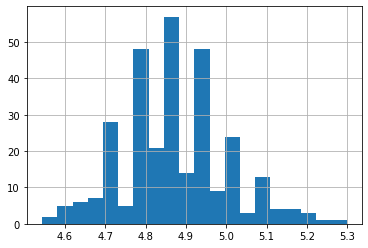

In [33]:
## Histogram - used for frequency distribution

data['trestbps_log']=np.log(data['trestbps'])
data['trestbps_log'].hist(bins=20) 

<AxesSubplot:>

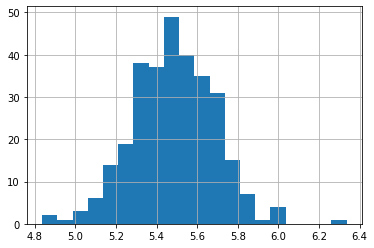

In [34]:
data['chol_log']=np.log(data['chol'])
data['chol_log'].hist(bins=20) 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


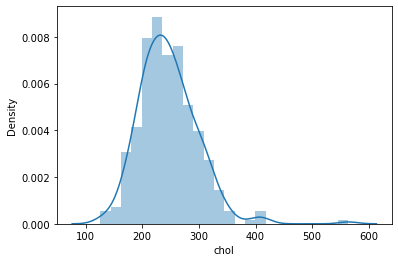

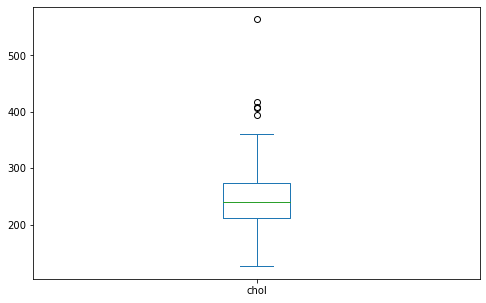

In [35]:
sns.distplot(data['chol']) 
plt.show()
data['chol'].plot.box(figsize=(8,5)) 
plt.show()

#### d.Study the composition of all patients with respect to the Sex category

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


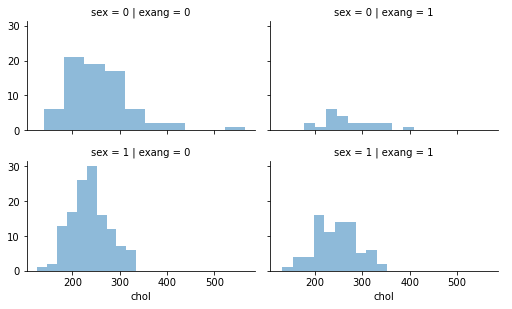

In [36]:
grid = sns.FacetGrid(data, row='sex', col='exang', size=2.2, aspect= 1.6)
grid.map(plt.hist, 'chol', alpha=.5, bins=10)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


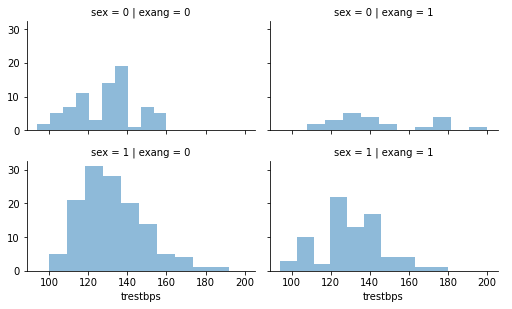

In [37]:
grid = sns.FacetGrid(data, row='sex', col='exang', size=2.2, aspect= 1.6)
grid.map(plt.hist, 'trestbps', alpha=.5, bins=10)
grid.add_legend()

### c.	Study the occurrence of CVD across the Age category

In the above plots also age category is covered. Using a dist plot we can see that the between 40-70 years of age the CVD is higher.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


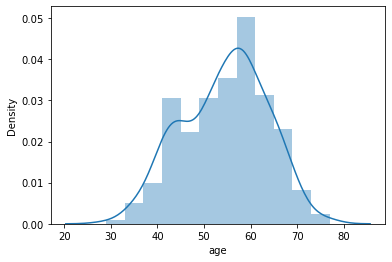

In [38]:
sns.distplot(data['age'])
plt.show()

### e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

The displot can infer that as the resting blood pressure increase there is high chance of heart attack


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


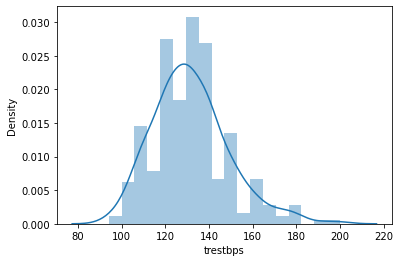

In [39]:
sns.distplot(data['trestbps'])
plt.show()

### f.Describe the relationship between cholesterol levels and a target variable

The target variable is a categorical value and the cholestrol level is a continuous variable.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


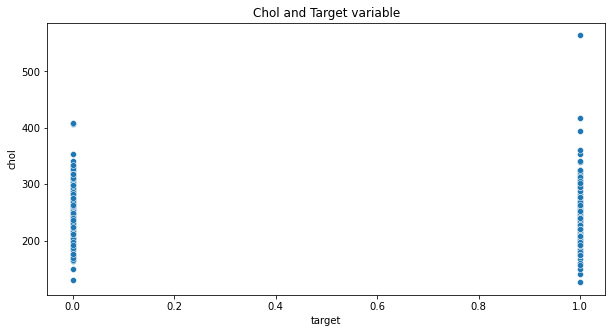

In [40]:
plt.figure(figsize=(10,5))
plt.title('Chol and Target variable')
plt.xlabel('target')
plt.ylabel('chol')
sns.scatterplot(data['target'],data['chol'])
plt.show()

### g.State what relationship exists between peak exercising and the occurrence of a heart attack

Higher peak excercise may or maynot impact heart attack 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


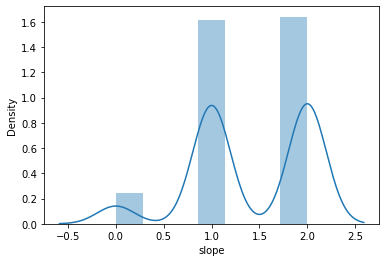

In [41]:
sns.distplot(data['slope'])
plt.show()

### h. Check if thalassemia is a major cause of CVD

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


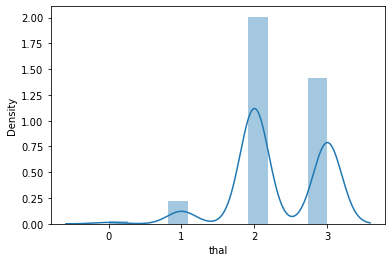

In [42]:
sns.distplot(data['thal'])
plt.show()

### i.	List how the other factors determine the occurrence of CVD

trestbps, chol, thalach, oldpeak, fbs, restecg, exang can determin the occurance of CVD

### j. Use a pair plot to understand the relationship between all the given variables

The below pair plot is used based on Sex and all the given variables.

In [43]:
import seaborn
import matplotlib.pyplot as plt

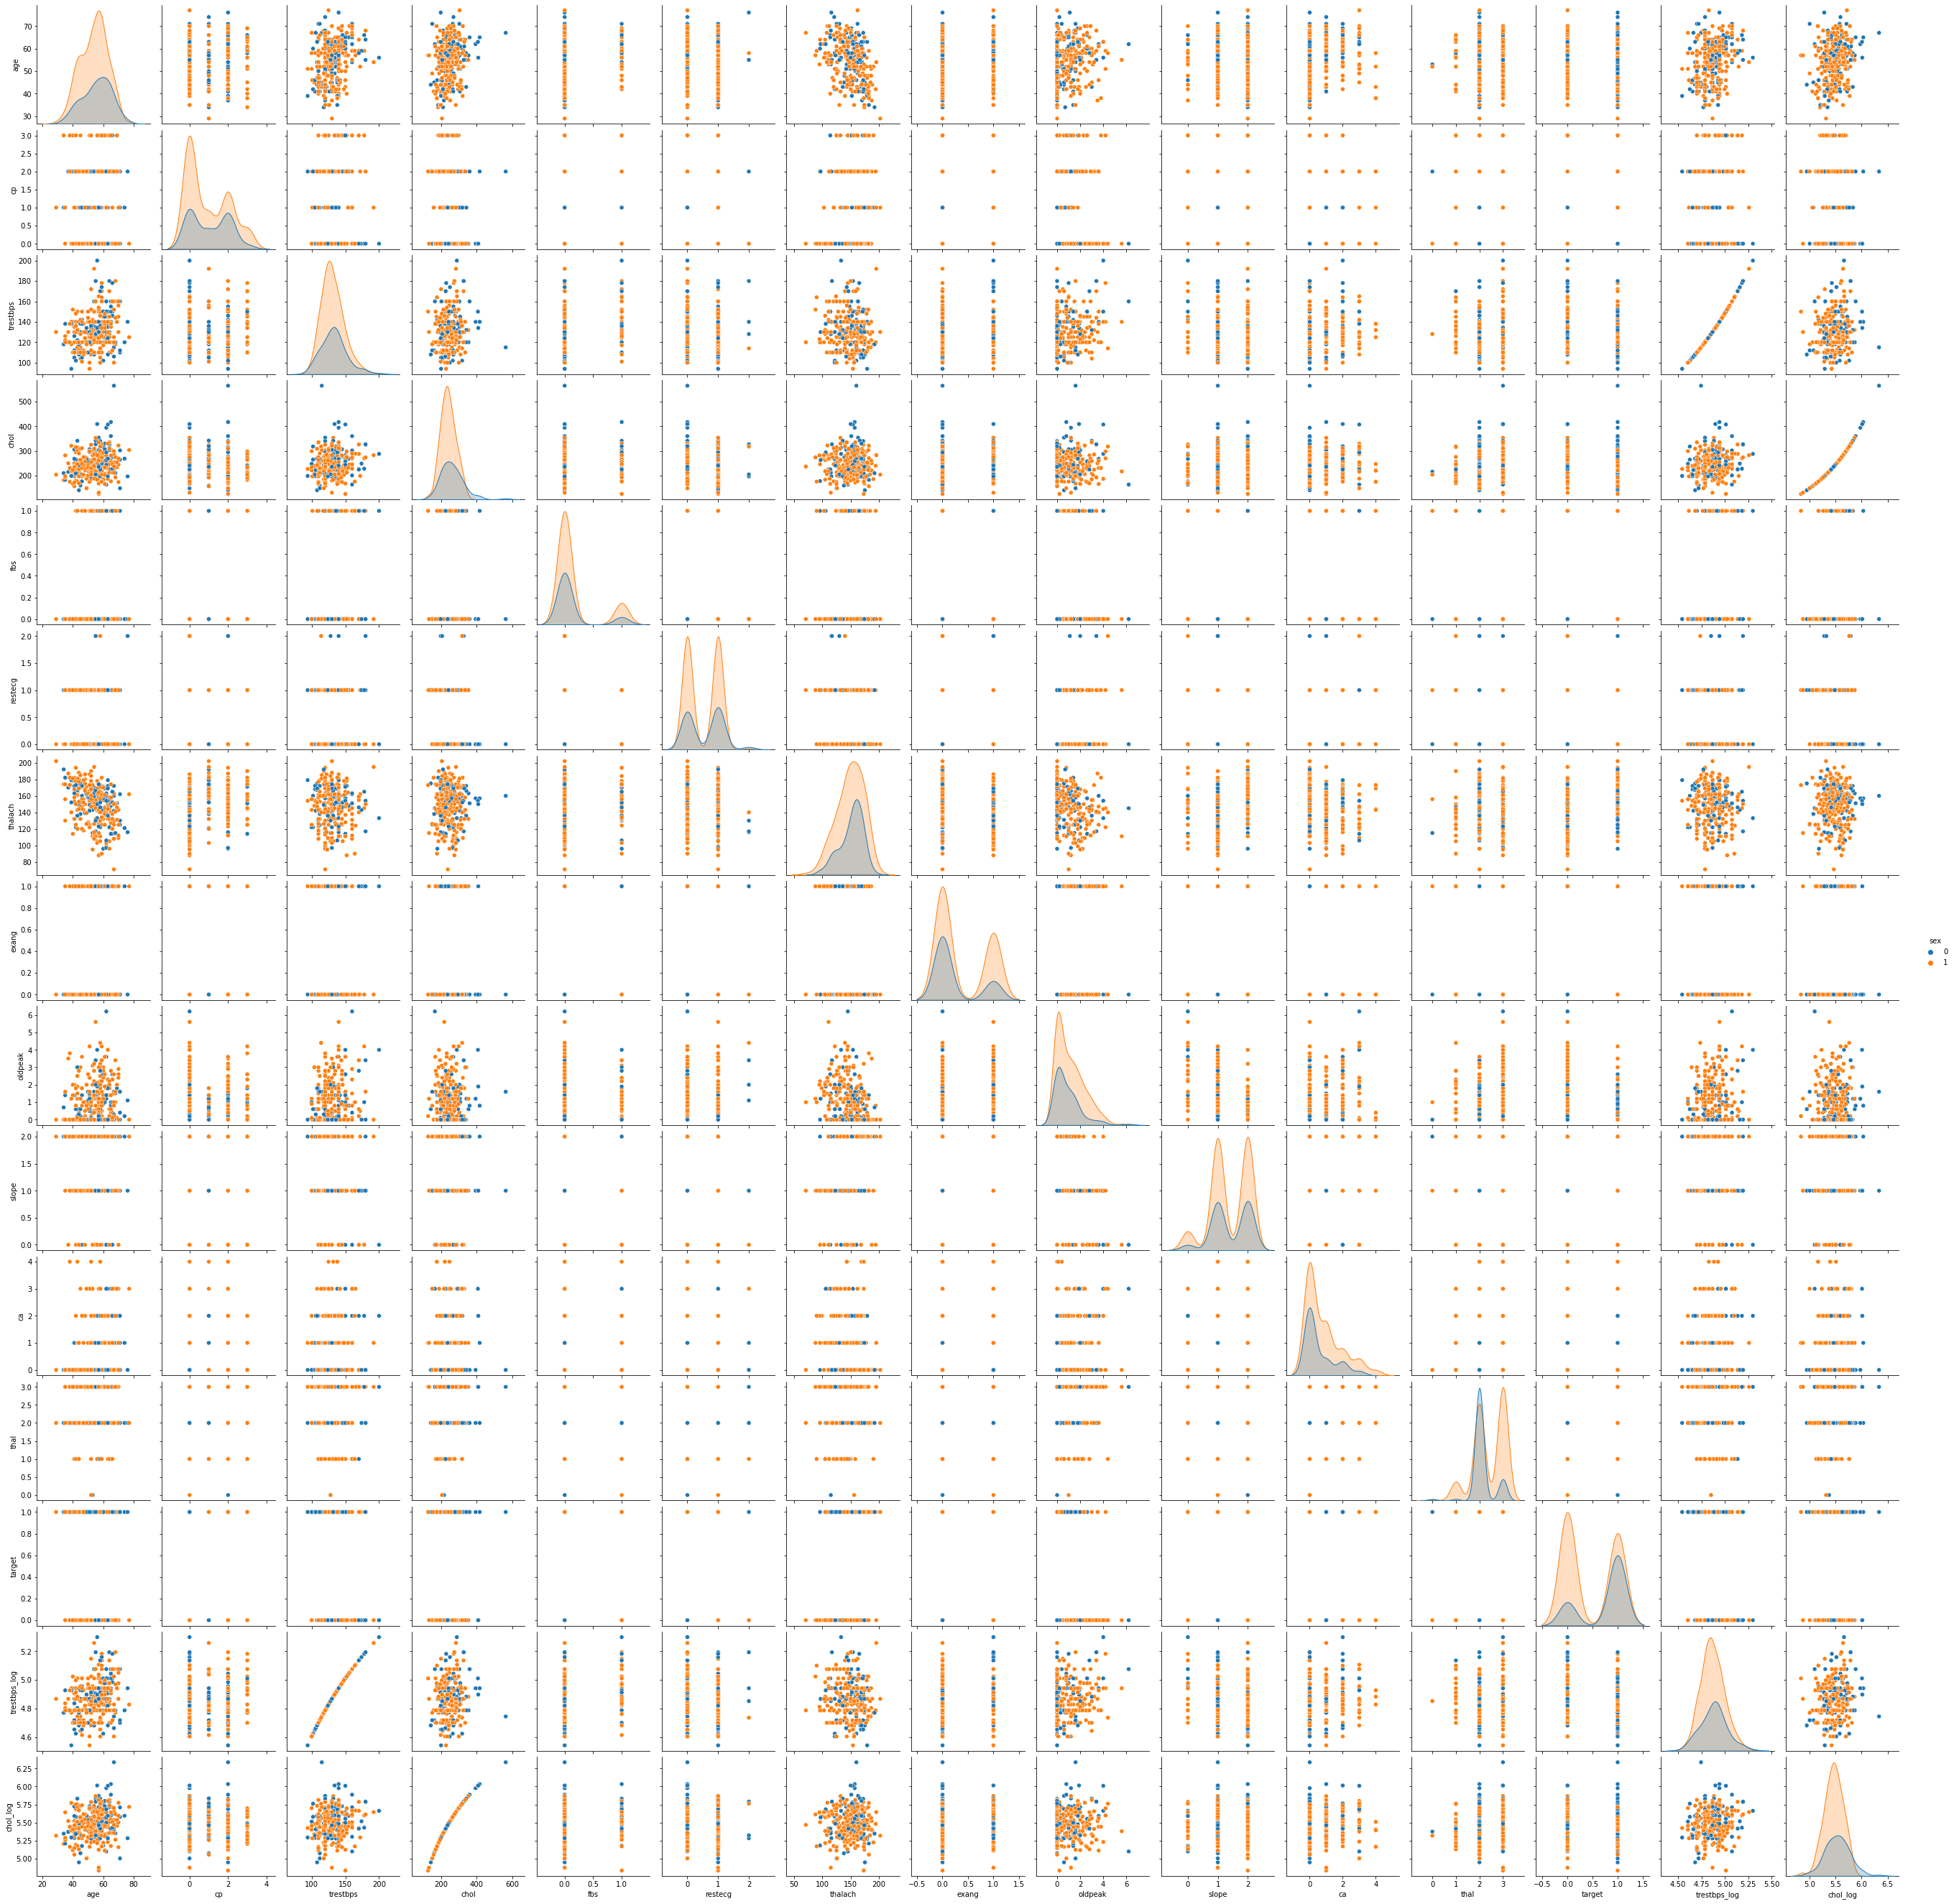

In [44]:
seaborn.pairplot(data, hue ='sex')
plt.show()

### 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection


### Solution

In this model logistic regression is used because this is a classification problem. The steps used in this model are:

#### Logistic Regression

* Using Label Encoder to convert categorial to numerical
* Check the datatypes
* Training and testing to train and fit the model using Logistic Regression
* Calculate the actual and predicted value
* Calculate the accuracy score
* Calculate the f1 score
* Create a Classification Report

#### Decision Tress classifier

* Import Desicion Tree classifier and fit the model
* Calculate predicated value
* Calculate the accuaracy score
* Calculate the f1 score
* Import the confusion matrix and predict the same
* Import tree to calculate the gini index. 
* Gini index checks the purity of the node. If close to 0 it is pure and close to 1 is impure.

#### Random Forest Classifier
* Import Random Forest Classifier and train the model.
* Calculate the accuracy score 
* Calculate the f1 score

* The same are also calculated using XGBoost classifier and ROC_curve and accuracy score are plotted.




In [45]:
### Using Label Encoder to convert categorial to numerical
from sklearn.preprocessing import LabelEncoder
var=['cp',
     'fbs', 
     'restecg', 
     'exang', 
     'slope',
     'ca',
     'thal']
le = LabelEncoder()
for i in var:
    data[i] = le.fit_transform(data[i])

In [46]:
data.dtypes

age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca                int64
thal              int64
target            int64
trestbps_log    float64
chol_log        float64
dtype: object

In [47]:
## Training and testing to train and fit the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x=data.drop('target', axis=1)
y=data.target

In [48]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=1, test_size=0.20)
Lg=LogisticRegression()
Lg.fit(x_train, y_train)
y_pred=Lg.predict(x_test)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [49]:
df_pred=pd.DataFrame()
df_pred['Actual']=y_test
df_pred['Predicted']=y_pred
df_pred

,Actual,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
...,...,...
0,1,1
288,0,0
259,0,1
179,0,0


In [50]:
df_pred=pd.DataFrame()
df_pred['Actual']=y_test
df_pred['Predicted']=y_pred
df_pred

,Actual,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
...,...,...
0,1,1
288,0,0
259,0,1
179,0,0


In [51]:
from sklearn.metrics import accuracy_score
print('accuracy score of test data', accuracy_score(y_test, y_pred)*100)

accuracy score of test data 73.77049180327869


In [52]:
from sklearn.metrics import f1_score
print('the f1 valuation ', f1_score(y_test, y_pred))

the f1 valuation  0.7575757575757576


In [53]:
from sklearn.metrics import classification_report
print('The classification report\n',
     classification_report(y_test, y_pred))

The classification report
               precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



#### Decision Tree and Random Forest

In [54]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(max_depth=2)
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [55]:
print('The accuracy score', accuracy_score(y_test, y_pred)*100)
print('the f1 valuation ', f1_score(y_test, y_pred))

The accuracy score 67.21311475409836
the f1 valuation  0.6666666666666667


In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[21,  9],
       [11, 20]], dtype=int64)

[Text(0.5, 0.8333333333333334, 'X[2] <= 0.5\ngini = 0.494\nsamples = 242\nvalue = [108, 134]'),
 Text(0.25, 0.5, 'X[11] <= 0.5\ngini = 0.377\nsamples = 111\nvalue = [83, 28]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.5\nsamples = 48\nvalue = [24, 24]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.119\nsamples = 63\nvalue = [59, 4]'),
 Text(0.75, 0.5, 'X[0] <= 56.5\ngini = 0.309\nsamples = 131\nvalue = [25, 106]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.142\nsamples = 78\nvalue = [6, 72]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.46\nsamples = 53\nvalue = [19, 34]')]

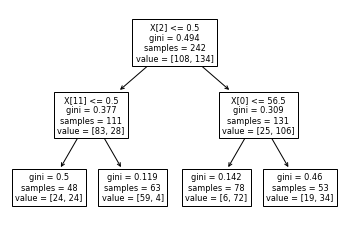

In [57]:
from sklearn import tree
tree.plot_tree(DTC)

#### Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [59]:
print('accuracy score', accuracy_score(y_test, y_pred)*100)
print('the f1 valuation ', f1_score(y_test, y_pred))

accuracy score 75.40983606557377
the f1 valuation  0.7761194029850746


In [60]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train, y_train)
y_pred=xg.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [61]:
print('accuracy score', accuracy_score(y_test, y_pred)*100)
print('the f1 valuation ', f1_score(y_test, y_pred))

accuracy score 78.68852459016394
the f1 valuation  0.8059701492537312


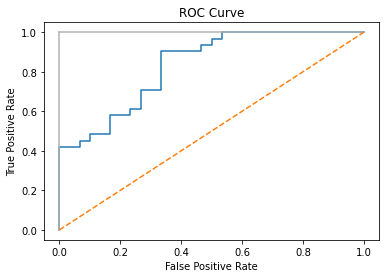

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
import matplotlib.pyplot as plt
y_prob=Lg.predict_proba(x_test)[:,1]
fpr, tpr, th=roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], ls="--")
plt.xlabel("False Positive Rate")
plt.show()

<AxesSubplot:>

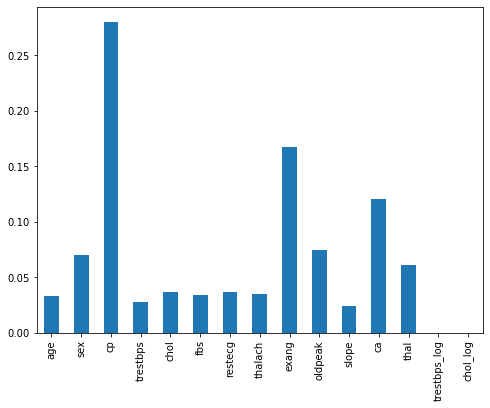

In [63]:
feature_pred = pd.Series(xg.feature_importances_, index=x.columns)
feature_pred.plot(kind='bar', figsize=(8,6))